In [1]:
#Ehtiyacımız olan kitabxanaları import edirik
import numpy as np
from  sklearn.manifold import TSNE
from gensim.models import Word2Vec
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import skipgrams
import gensim
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
#Korpusun hazırlanması.Qeyd edimki fəlsəfə.txt faylını internet üzərindən elektron kitab formasında yükləyib txt -mətn faylına çevirmişəm.
#söz,cümlələrin daha çox təşkil etdiyi bazanı təşkil etsəniz daha məqsədəuyğundur.
#Nümunə üçün ifadə sayı az olan data hazırladım
file=open('fəlsəfə.txt','r',encoding='utf-8')
text=file.read()
text_list=text.split('\n')
corpus=[] 
for sentence in text_list:
    corpus.append(sentence.split())
    



In [17]:
print(corpus[20:40])#Hazırladığımız korpus daxilində Siyahıları çap edək

[['Deyə', 'bilərik', 'ki,', 'fəlsəfə', 'mənəvi', 'təfəkkür', 'mədəniyyətinin', 'aynca'], ['bir', 'hissəsidir.', 'O,', 'fəlsəfəni', 'öyrənən', 'insanı', 'praktiki', 'həyat', 'proqra-'], ['mı,', 'həyatm', 'ali', 'mənasınm', 'dərk', 'edilməsi,', 'əxlaqi', 'ideallar', 'ilə'], ['silahlandırmağı', 'qarşısma', 'məqsəd', 'qoymuşdur.', 'İ.Kant', 'fəlsəfənin'], ['fəal', 'praktiki', 'xarakterini', 'vurğulayaraq', 'yazırdı:', '"Ümumiyyətlə,'], ['müdriklik', 'bilikdən', 'daha', 'çox', 'fəaliyyət', 'tərzindən', 'ibarətdir..."'], ['Fəlsəfə', 'mükəmməl', 'müdriklik', 'ideyasmı', 'təcəssüm', 'etdirir,', 'insan'], ['zəkasmm', 'ali', 'məqsədlərini', 'göstərir.', 'Filosofluğun', 'mahiyyəti', 'ali'], ['mənəvi', 'dəyərləri', 'əsaslandırmaqdır.'], ['Fəlsəfə', 'dünyanı', 'əvvəlcə', 'dərk', 'edən,', 'sonra', 'isə', 'onu', 'qiymətləndirən'], ['insanm', 'mənəvi', 'istiqamətləndirilməsi', 'funksiyasmı', 'yerinə', 'yetirir.'], ['Insanda', 'insaniyyətlik,', 'bütövlükdə', 'insanın', 'nə', 'demək', 'olduğu', 'fəl-'],

In [22]:
#modelin hazırlanması. 

model=Word2Vec(corpus,size=200,window=6,min_count=3,sg=1)

In [23]:
#hazırladığımız model daxilində əgər qeyd etdiyimiz ifadə varsa,həmin kəlimənin vektorunu ekrana çap edək
model.wv['insan']

array([ 3.26409712e-02, -1.11495465e-01, -1.09878801e-01, -1.61514040e-02,
        6.24946095e-02, -5.53264767e-02,  1.88343860e-02, -3.00338143e-03,
       -1.54164627e-01, -6.94016367e-02,  1.75558016e-01,  8.69417936e-02,
       -1.10796735e-01,  1.27597913e-01,  3.24147604e-02, -8.59652385e-02,
       -1.06904596e-01, -7.82519951e-03, -6.84554502e-02, -1.47515396e-02,
       -2.78657645e-01,  4.68119048e-02,  1.52560091e-02, -1.48065791e-01,
       -2.51362454e-02,  2.92899042e-01, -1.05379529e-01, -1.87575333e-02,
       -4.77716625e-02,  3.28583457e-02,  3.02299708e-02,  1.03040852e-01,
       -1.07400946e-01, -3.28874253e-02,  6.55905455e-02,  3.99901494e-02,
        2.63467044e-01,  9.41064358e-02,  2.23817974e-02,  1.03699096e-01,
       -2.05597328e-03,  8.52277204e-02, -8.59272853e-02, -9.81159657e-02,
        1.44426316e-01, -2.54338473e-01,  1.51943818e-01,  1.62482157e-01,
       -1.43855318e-01, -1.24393135e-01,  1.74871590e-02,  1.57655582e-01,
       -4.18598764e-02,  

In [24]:
#Nümunə-2
model.wv['fəlsəfə']

array([ 0.03672487, -0.11063578, -0.09298438, -0.01961881,  0.05883814,
       -0.05005358,  0.01460049, -0.00244978, -0.15134725, -0.07507091,
        0.1764792 ,  0.08856005, -0.11544561,  0.13122901,  0.02955697,
       -0.08000021, -0.10689594,  0.00531672, -0.07659401, -0.01527801,
       -0.27507988,  0.04865298,  0.01300979, -0.1417728 , -0.03595459,
        0.28508767, -0.09412222, -0.01767964, -0.04387366,  0.03011   ,
        0.02358693,  0.0996635 , -0.09814694, -0.03415545,  0.06359842,
        0.03232848,  0.26601103,  0.09013285,  0.02571068,  0.10172583,
        0.0037668 ,  0.08692713, -0.1003412 , -0.112596  ,  0.14631188,
       -0.24764411,  0.14783219,  0.16150057, -0.14564918, -0.13154925,
        0.02838645,  0.1582608 , -0.03364202,  0.0879885 ,  0.184548  ,
        0.05923637, -0.04229917, -0.06881441, -0.09906287, -0.06171657,
        0.15408097,  0.08527215, -0.09394798,  0.04990359,  0.01185089,
        0.16424245,  0.07482858,  0.01466847, -0.05632894,  0.15

In [25]:
#Birbirinə bənzər-yaxınlıq elementləri üçün ifadəni test edək
model.wv.most_similar('fəlsəfə')

[('insanın', 0.9992678761482239),
 ('Lakin', 0.9992508292198181),
 ('öz', 0.9992502927780151),
 ('bütün', 0.9992022514343262),
 ('olan', 0.9990972876548767),
 ('mənəvi', 0.9990404844284058),
 ('yeni', 0.9989932179450989),
 ('həmin', 0.9989911317825317),
 ('edilməsi', 0.9987608194351196),
 ('fəlsəfi', 0.9987296462059021)]

In [26]:
#Hazırladığımız modeli data qovluğunda yaddaşda saxlayaq.
model.save('model/word2vec.model')
print('Model yaddaşda saxlanıldı')

Model yaddaşda saxlanıldı


Ifadəni yazın:fəlsəfə


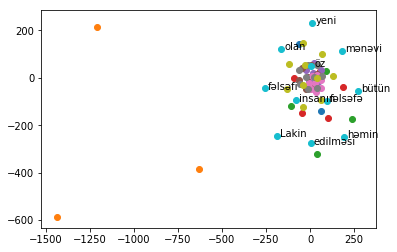

In [28]:

words=input("Ifadəni yazın:")
def _TSNE(model,words):
    word_vec=np.empty((0,200))
    word_label=[words]
    similar_words=model.wv.most_similar(words)
    word_vec=np.append(word_vec,np.array([model.wv[words]]),axis=0)
    model=Word2Vec.load('model/word2vec.model')
    for w,v in similar_words:
        word_label.append(w)
        word_vec=np.append(word_vec,np.array([model.wv[w]]),axis=0)
        _tsne=TSNE(random_state=0)
        y_tsne=_tsne.fit_transform(word_vec)
        x_coordinate=y_tsne[:,0]
        y_coordinate=y_tsne[:,1]
        plt.scatter(x_coordinate,y_coordinate)
    for label,x,y in zip(word_label,x_coordinate,y_coordinate):
        plt.annotate(label,xy=(x,y),xytext=(3,-1),textcoords='offset points')

    plt.show()
_TSNE(model,words)

In [29]:
#Mavi ilə qeyd olunmuş elementlər daxil etdiyimiz kəliməyə yaxınlıq prinspi ilə koordinat daxilində qeyd olunmuşdur

In [31]:
#Fəlsəfə kəliməsinə yaxınlıq gələn ifadələr yaxınlıq-prinsipinə əsaslanaraq sıralanmışdır
model.wv.most_similar('fəlsəfə')

[('insanın', 0.9992678761482239),
 ('Lakin', 0.9992508292198181),
 ('öz', 0.9992502927780151),
 ('bütün', 0.9992022514343262),
 ('olan', 0.9990972876548767),
 ('mənəvi', 0.9990404844284058),
 ('yeni', 0.9989932179450989),
 ('həmin', 0.9989911317825317),
 ('edilməsi', 0.9987608194351196),
 ('fəlsəfi', 0.9987296462059021)]

In [32]:
#Corpusun format datası-nın təşkili

In [33]:
file = open('fəlsəfə.txt',encoding='utf-8').readlines()
corpus = [sentence for sentence in file if sentence.count(' ') >= 2]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
length = len(tokenizer.word_index) + 1
print(length)

18829


In [34]:
batch_size = 64
# inputs
_inputs = Input(shape=(1, ), dtype='int32')
_embeding = Embedding(length, batch_size)(_inputs)

# context
Inputs = Input(shape=(1, ), dtype='int32')
c  = Embedding(length, batch_size)(Inputs)
_axes = Dot(axes=2)([_embeding, c])
_axes = Reshape((1,), input_shape=(1, 1))(_axes)
_axes = Activation('sigmoid')(_axes)

SkipGram = Model(inputs=[_inputs, Inputs], outputs=_axes)
SkipGram.summary()
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 64)        1205056     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 64)        1205056     input_2[0][0]                    
_____________________________________

In [ ]:
for _ in range(5):
    loss = 0.
    for i, doc in enumerate(tokenizer.texts_to_sequences(corpus)):
        data, labels = skipgrams(sequence=doc, vocabulary_size=length, window_size=6, negative_samples=5.)
        x = [np.array(x) for x in zip(*data)]
        y = np.array(labels, dtype=np.int32)
        if x:
            loss += SkipGram.train_on_batch(x, y)

    print(loss)

Instructions for updating:
Use tf.cast instead.


In [35]:
f = open('model/f_vectors.txt' ,'w',encoding='utf-8')
f.write('{} {}\n'.format(length-1, batch_size))
vectors = SkipGram.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [36]:
model = gensim.models.KeyedVectors.load_word2vec_format('model/f_vectors.txt', binary=False)

In [40]:
model.most_similar(positive=['həyat'])

[('məäamlarla', 0.4860852062702179),
 ('sürülmüş', 0.45908600091934204),
 ('zühur', 0.42172056436538696),
 ('heyvanlardan', 0.41629207134246826),
 ('immaimiel', 0.4110863208770752),
 ('başlanğı', 0.4094387888908386),
 ('artımına', 0.4021345376968384),
 ('etdirirdi', 0.401907354593277),
 ('sayxla', 0.40079012513160706),
 ('tələbləri', 0.3944016396999359)]

In [43]:
model.most_similar(positive=['beyin'])

[('oynamalıdır', 0.5068039894104004),
 ('qızıl', 0.48888951539993286),
 ('başlamr', 0.46947741508483887),
 ('əvvəli', 0.46160268783569336),
 ('əka', 0.4425356388092041),
 ('pozulmasma', 0.43622368574142456),
 ('irıkişafm', 0.42799878120422363),
 ('kəskin', 0.41223329305648804),
 ('kəskinliyi', 0.4116126000881195),
 ('xum', 0.4100416898727417)]